<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/multiple_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns


In [ ]:
df=pd.read_excel("/Users/chenyenpin/Downloads/4_22/Limite_Credito_Dummy.xlsx")
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,genero,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [ ]:
df.isna().sum()

Idade                      0
RendimentoTotal            0
Salario                    0
LimitedeCreditoImediato    0
Escolaridade               0
Regiao                     0
genero                     0
LimitedoChequeEspecial     0
dtype: int64

In [ ]:
le=LabelEncoder()

In [ ]:
le.fit(df.Escolaridade)
df.Escolaridade=le.transform(df.Escolaridade)

le.fit(df.genero)
df.genero=le.transform(df.genero)

le.fit(df.Regiao)
df.Regiao=le.transform(df.Regiao)

In [ ]:
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,genero,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


<AxesSubplot:>

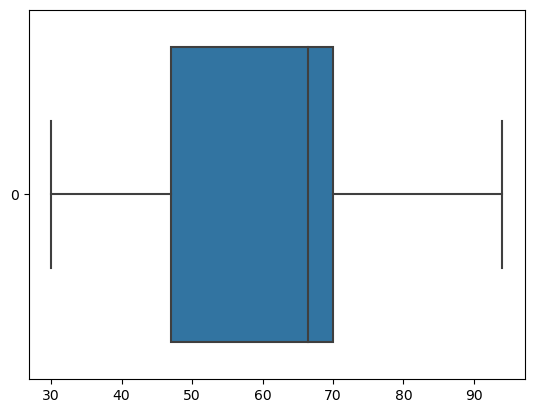

In [ ]:
sns.boxplot(data=df["Idade"], orient="h")

<AxesSubplot:xlabel='Idade', ylabel='Count'>

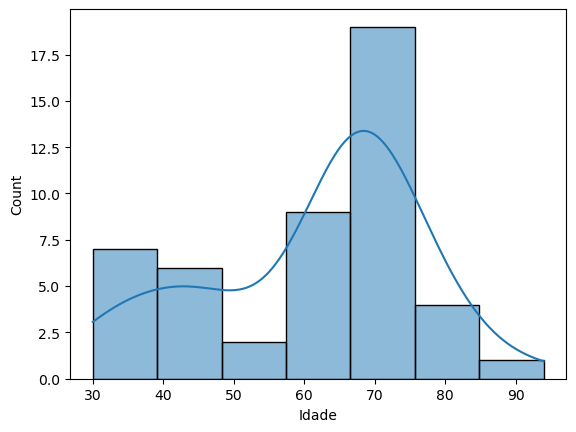

In [ ]:
sns.histplot(df.Idade, kde=True)


In [ ]:
df.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,genero,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [ ]:
scaler=MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),index=df.index, columns=df.columns)

df_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,genero,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import statsmodels.formula.api as smf

function="LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Regiao+genero"
model=smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Fri, 09 Jun 2023   Prob (F-statistic):           7.44e-17
Time:                            22:37:09   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
function="LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Regiao+genero"
model=smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Fri, 09 Jun 2023   Prob (F-statistic):           9.97e-18
Time:                            22:37:10   Log-Likelihood:                 67.299
No. Observations:                      48   AIC:                            -120.6
Df Residuals:                          41   BIC:                            -107.5
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
function="LimitedoChequeEspecial~Salario+Regiao+genero -1"
model=smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Fri, 09 Jun 2023   Prob (F-statistic):                    2.56e-25
Time:                            22:37:10   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
x=df_norm[["Salario", "genero", "Regiao"]]
y=df_norm[["LimitedoChequeEspecial"]]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
r2=lr.score(x,y)
r2

0.8743700322188699

In [ ]:
y_pred_train=lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.03369009365701896
MSE: 0.002252899550747987
RMSE: 0.04746471901052388


In [ ]:
y_pred=lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.06987270468300605
MSE: 0.01009174141999736
RMSE: 0.10045765983735316
